In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

# Load data set

In [3]:
data = pd.read_csv('/Users/Qinmeng/Documents/Python/Doc/Data/TakeHomeChallenges_data/datasets/01-ConversionRate/conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


A few quick observations from above results:
1. User base is pretty young, i.e. mean(age) is small
2. Conversion rate at around 3% is industry standard. It makes sense.
3. Everything seems to make sense here except for max age 123 yrs! Let’s investigate it:

# Remove Outliers

(array([6., 5., 5., 6., 5., 5., 6., 5., 5., 5., 3., 2., 0., 0., 0., 0., 0.,
        1., 0., 1.]),
 array([ 17. ,  22.3,  27.6,  32.9,  38.2,  43.5,  48.8,  54.1,  59.4,
         64.7,  70. ,  75.3,  80.6,  85.9,  91.2,  96.5, 101.8, 107.1,
        112.4, 117.7, 123. ]),
 <a list of 20 Patch objects>)

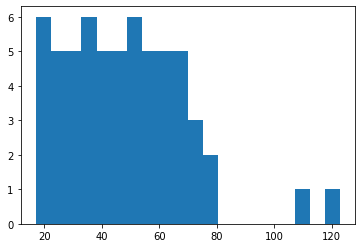

In [6]:
view_age = sorted(data['age'].unique(), reverse= True)
plt.hist(view_age, bins = 20)

In [7]:
data[data['age'] > 90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


Only 2 users among 316200 users have age >80. Let's first remove them directly.

In [8]:
data = data[data['age'] <= 90]

# Exploratory Data Analysis

In [9]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:1d}\t'.format(column, len(uniques)), uniques[:5])

country              4	 ['China', 'Germany', 'UK', 'US']
age                  58	 [17, 18, 19, 20, 21]
new_user             2	 [0, 1]
source               3	 ['Ads', 'Direct', 'Seo']
total_pages_visited  29	 [1, 2, 3, 4, 5]
converted            2	 [0, 1]


### Analysis on different countries:

In [10]:
grouped_country_coverted = data[['country', 'converted']].groupby('country').mean().reset_index()
grouped_country_coverted

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


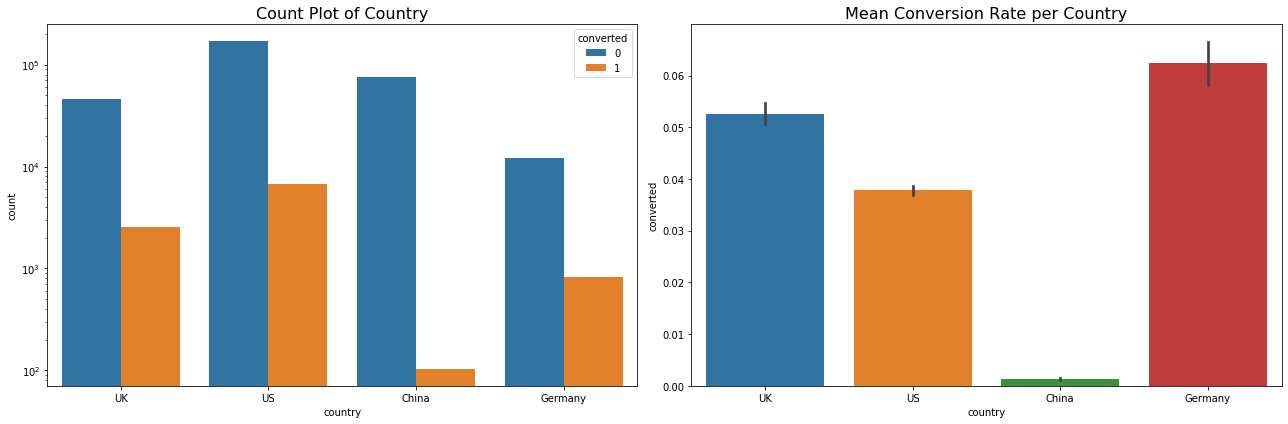

In [11]:
# Visualization of different countries
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0]) # Use all data to  do the countplot
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=data, ax=ax[1]) # Use all data to  do the barplot
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

Conclusion from above analysis:
* China has a much low conversion rate compared with the other countries

### Analysis on user types

In [12]:
# Visualization of different user types
grouped_newuser_coverted = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()
grouped_newuser_coverted

,new_user,converted
0,0,0.071983
1,1,0.014021


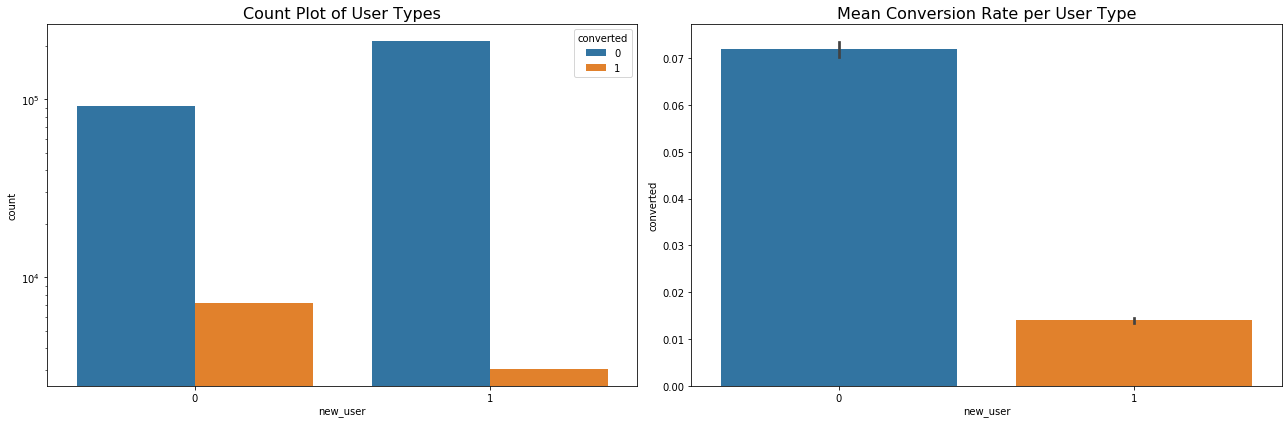

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]) # Use all data to  do the barplot
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

Conclusion from above analysis:
* New users have a much higher conversion rate compared with the old users

### Analysis on different factors: age, source, total_pages_visited

**1. Source**:

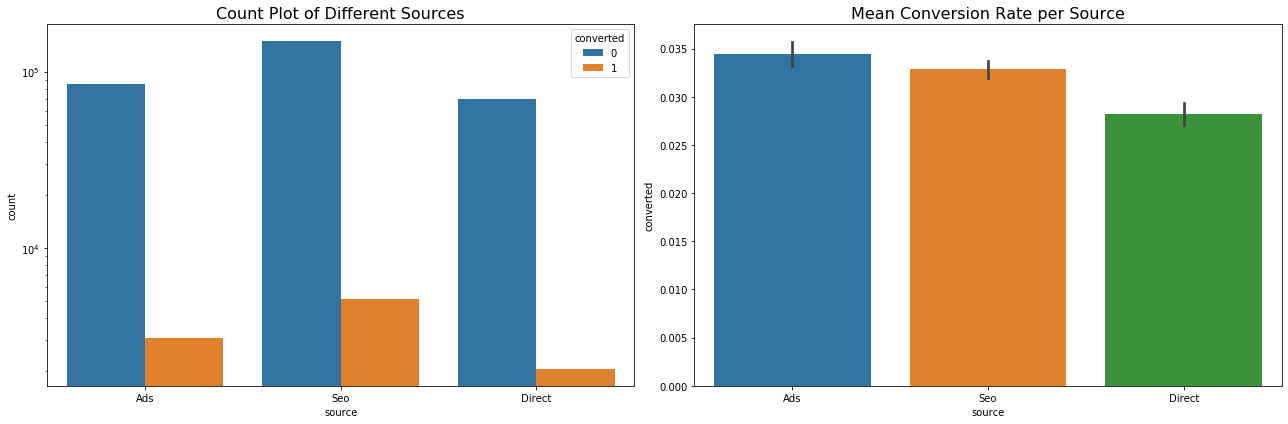

In [14]:
# Visualization of different sources
grouped_source_converted = data[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

Conclusion from above analysis:
* Seo have a much higher conversion rate compared with the other sources

**2. Age**:

In [15]:
# Visualization of different ages
grouped_age_converted = data[['age', 'converted']].groupby('age').mean().reset_index()

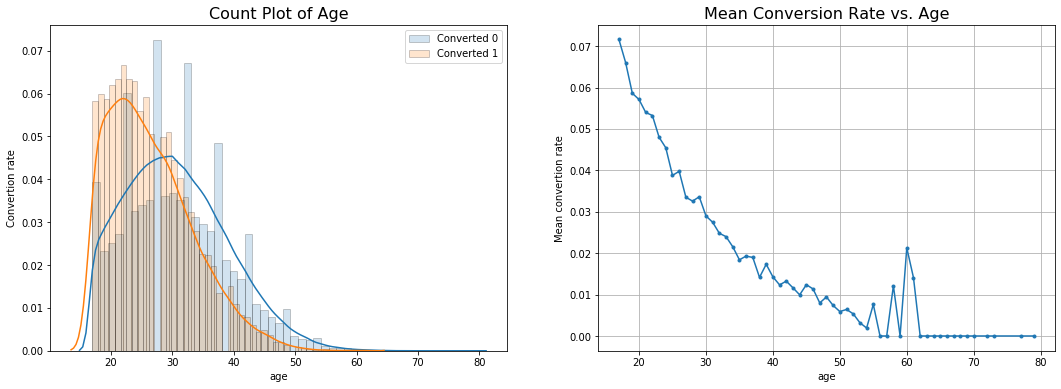

In [16]:
hist_kws = {'histtype':'bar', 'edgecolor':'black', 'alpha':0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)

ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].set_xlabel('age')
ax[0].set_ylabel('Convertion rate')
ax[0].legend()
ax[1].plot(grouped_age_converted['age'], grouped_age_converted['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

Conclusion from above analysis:
* Younger people could have a  higher conversion rate in general

**3. Total_pages_visited**:

In [17]:
# Visualization of different number of total_pages_visited
grouped_pagesvisited_converted = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

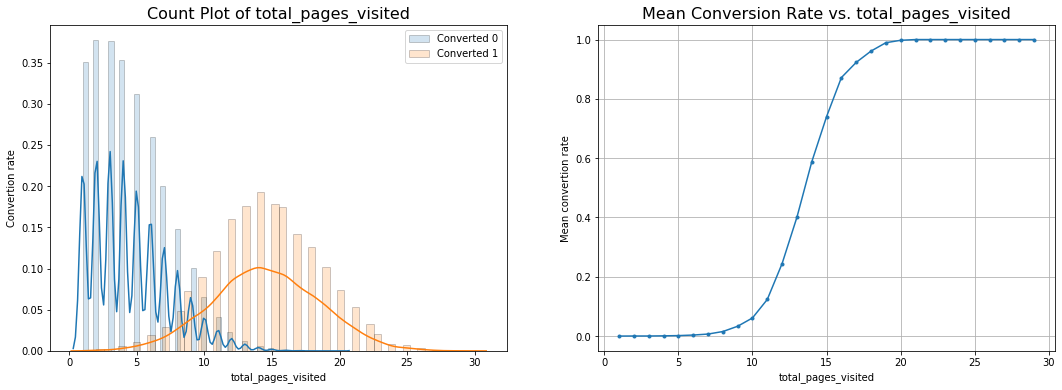

In [18]:
hist_kws = {'histtype':'bar', 'edgecolor':'black', 'alpha':0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['total_pages_visited'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)

ax[0].set_title('Count Plot of total_pages_visited', fontsize=16)
ax[0].set_xlabel('total_pages_visited')
ax[0].set_ylabel('Convertion rate')
ax[0].legend()
ax[1].plot(grouped_pagesvisited_converted['total_pages_visited'], grouped_pagesvisited_converted['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

Conclusion from above analysis:
* The conversion rate increases with the number of total_pages_visited

# Machine Learning Models

Let’s now build a model to predict conversion rate. Outcome is binary and you care about insights to give product and marketing team some ideas. You should probably choose among the following models:
* Logistic regression
* SVM
* Random Forest in combination with partial dependence plots
* Decision Trees

## Data processing for ML models

Note: **Original dataframe has Categorical features 'country' and 'source', we use One-Hot-Encoding to transform them into numerical values**

In [19]:
X_region_Source = data.loc[:,('country','source')]
X_region_Source = pd.get_dummies(X_region_Source)# OHE those categorical features
X_region_Source.head()

,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1


In [20]:
# Drop the unneeded dummy variable
# Drop 'country_Germany' from X
X_region_Source_drop = pd.get_dummies(data.loc[:,('country','source')], drop_first=True)

# Print the new columns of df_region
print(X_region_Source_drop.columns)

Index(['country_Germany', 'country_UK', 'country_US', 'source_Direct',
       'source_Seo'],
      dtype='object')


In [21]:
X_region_Source_drop.head()

,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,0,1,0,0,0
1,0,0,1,0,1
2,0,0,1,0,1
3,0,0,0,0,1
4,0,0,1,0,1


In [22]:
X = pd.merge(data.loc[:,('age','new_user','total_pages_visited')], X_region_Source_drop, left_index=True, right_index=True)

In [23]:
X.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1


In [24]:
y = data['converted']
y.mean()

0.03225194340255157

From y's mean(), we know that, target value is very imbalanced, which reminds us should not use plain 'accurancy' as the metric to judge a classifier is good or not
then we need to split the whole dataset into 'training' dataset and 'test' dataset

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [26]:
y_train.mean(),y_test.mean()

(0.0322538380214875, 0.03224752266497997)

Since both ytrain.mean() and ytest.mean() are similar to y.mean(), we can say, the splitting process doesn't import any bias

## Classification via Logistic Regression

In [27]:
## since the problem cares giving explanation on each factor
## it seems it would be better to use L1 penalty
## however, L1 penalty doesn't produce a sparse coeffecient, but AUC is much lower
## so I switch back to use L2 penalty
lrcv = LogisticRegressionCV(Cs = np.logspace(-3,3,7),
                            dual=False,
                            scoring='roc_auc',
                            max_iter=1000,
                            n_jobs=-1,
                            verbose=1)
lrcv.fit(X_train,y_train)

/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.3s finished


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                     class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=1)

In [28]:
y_pred = lrcv.predict(X_test)

In [29]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[91423   378]
 [  913  2146]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.85      0.70      0.77      3059

    accuracy                           0.99     94860
   macro avg       0.92      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860



In [31]:
print('Training accuracy = ', lrcv.score(X_train,y_train),
      'Testing accuracy = ', lrcv.score(X_test,y_test))

Training accuracy =  0.9861090491038373 Testing accuracy =  0.9858966136649481


/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [32]:
1 - y_test.mean()

0.96775247733502

From above:
1. we know for "label=converted", good precision, bad recall. We need to lower down the cut-off probability to be 1, which will increase the recall with the price lower the precision
2. since this is an imbalanced classification problem, if we group every record as 'NOT converted', we can still get 96.77 accuracy (1-y_test.mean()). since our LR model produces an accurancy as 98.57% on test dataset, which indicates it is a model which makes sense.
3. This model can be improved by reselecting a balanced sample set.

In [33]:
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":lrcv.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_Germany,3.767436,3.767436
4,country_UK,3.580747,3.580747
5,country_US,3.249548,3.249548
1,new_user,-1.743340,1.743340
2,total_pages_visited,0.761966,0.761966
6,source_Direct,-0.156241,0.156241
0,age,-0.075815,0.075815
7,source_Seo,-0.016954,0.016954


If some dummies are not dropped:

from above model, we can draw below conclusion:
1. conversion among China users are very bad. from inspection, we know that there are lot of users coming from China, but their conversion rate is very low. Consider China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate. we should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.
1. conversion from Germany is good. but inspection, we know that there isn't a lot of users from German. so it's a huge opportuntity for us to target German users. for example, put more advertisement in German.
1. old users have better conversion rate. we should keep touch with them, for example, send promotion email or coupons to old users.
1. age is a negative factor. the older the user is, the less likely he/she will convert. then we should figure out why young people loves the web pages and strengthen it. and also find out why older people doesn't like our web pages, and try to correct it.
1. total_pages_visited is a positive factor. the longer the user browse our web page, the more likely he/she will convert and buy something. then if we find some user browse a lot and didn't buy anything, we can send email to remaind them.

## Classification via SVM

In [34]:
svm = LinearSVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test)) 

0.983138909721783
0.9829749103942652


/Users/Qinmeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
y_pred = svm.predict(X_test)

In [36]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[90811   990]
 [  625  2434]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91801
           1       0.71      0.80      0.75      3059

    accuracy                           0.98     94860
   macro avg       0.85      0.89      0.87     94860
weighted avg       0.98      0.98      0.98     94860



From above results, the F1-score for "label=converted" can be improved by Linear SVM model with the price of lower the precision

**A few references**:
1. EDA: https://github.com/JifuZhao/DS-Take-Home/blob/master/01.%20Conversion%20Rate.ipynb
2. ML: https://github.com/stasi009/TakeHomeDataChallenges/blob/master/01.ConversionRate/Report.ipynb
3. ML: https://github.com/AmoDinho/datacamp-python-data-science-track/blob/master/Supervised%20Learning%20with%20scikit-learn/Chapter%204%20-%20Preprocessing%20and%20pipelines.py
2. Random Forest model: https://github.com/tana777/ds-take-home-challenge/blob/master/01.Conversion_Rate.ipynb
5. A collection of take home challenges: guideline